In [86]:
import geojson
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import json
from shapely.geometry import mapping, shape
import matplotlib.pyplot as plt

# lebanon rivers from stanford

In [14]:
df_boundary = gpd.read_file('./lebanon-outline.geojson')

In [17]:
df_boundary

,id,name,geometry
0,LBN,Lebanon,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."


In [15]:
df_rivers = gpd.read_file('./stanford-rivers-geojson.json')

Text(0.5, 1.0, 'stanford rivers')

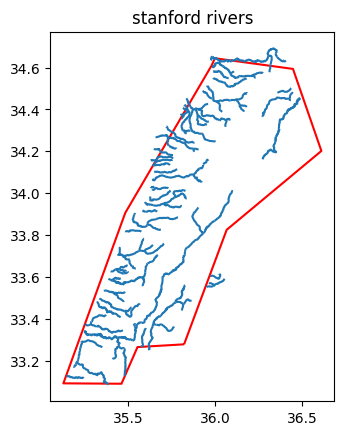

In [19]:
ax = df_boundary.boundary.plot(color='red')
df_rivers.plot(ax=ax)
plt.title('stanford rivers')

# Binary image to polygons

In [ ]:
import rasterio
from rasterio import features
import shapely
from shapely.geometry import Point, Polygon

c:\users\fogle\pycharmprojects\chicago-crimes-exploration\venv\lib\site-packages\rasterio\__init__.py:334: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


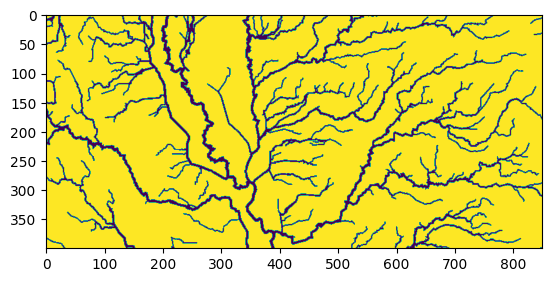

In [75]:
import rasterio
from rasterio.features import shapes
mask = None
with rasterio.Env():
    with rasterio.open('image.jpg') as src:
        image = src.read(1)
        image = np.where(image > 128, 255, 0)
        plt.imshow(image)
        results = ({'properties': {'raster_val': v}, 'geometry': s} for i, (s, v) in enumerate(shapes(image, mask=mask, transform=src.transform, connectivity=8)))

In [76]:
geoms = list(results)

In [77]:
geoms

[{'properties': {'raster_val': 255.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(559.0, 0.0),
     (559.0, 2.0),
     (560.0, 2.0),
     (560.0, 1.0),
     (561.0, 1.0),
     (561.0, 0.0),
     (559.0, 0.0)]]}},
 {'properties': {'raster_val': 255.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(566.0, 0.0),
     (566.0, 1.0),
     (567.0, 1.0),
     (567.0, 0.0),
     (566.0, 0.0)]]}},
 {'properties': {'raster_val': 255.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(0.0, 0.0),
     (0.0, 9.0),
     (1.0, 9.0),
     (1.0, 8.0),
     (3.0, 8.0),
     (3.0, 7.0),
     (6.0, 7.0),
     (6.0, 6.0),
     (9.0, 6.0),
     (9.0, 5.0),
     (10.0, 5.0),
     (10.0, 4.0),
     (11.0, 4.0),
     (11.0, 3.0),
     (12.0, 3.0),
     (12.0, 1.0),
     (13.0, 1.0),
     (13.0, 0.0),
     (0.0, 0.0)]]}},
 {'properties': {'raster_val': 0.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(218.0, 0.0),
     (218.0, 2.0),
     (219.0, 2.0),
     (219.0, 3.0),
   

In [78]:
geoms = [g for g in geoms if g['properties']['raster_val'] == 0]

In [79]:
gpd_polygonized_raster  = gpd.GeoDataFrame.from_features(geoms)

In [80]:
len(gpd_polygonized_raster)

16

In [81]:
polygons = list(gpd_polygonized_raster['geometry'])

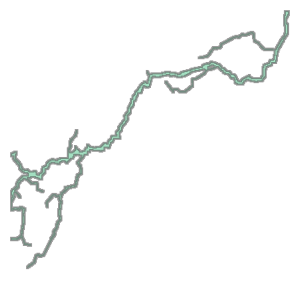

In [84]:
polygons[7]

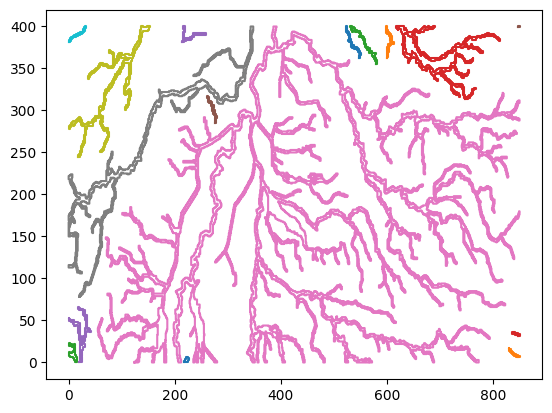

In [91]:
_,ax = plt.subplots()

for shape in polygons:
    xe, ye = shape.exterior.xy
    ax.plot(xe, ye)

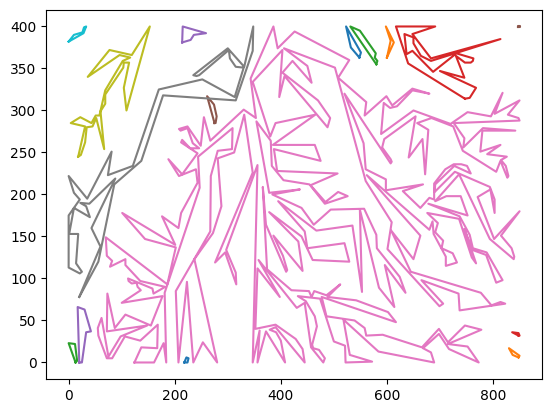

In [96]:
_,ax = plt.subplots()

for shape in polygons:
    xe, ye = shape.simplify(tolerance=20).exterior.xy
    ax.plot(xe, ye)